In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DAL/predictive_maintenance.csv')
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
data = data.drop(["UDI",'Product ID'],axis=1)
data.head(3)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [7]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
data.groupby(['Failure Type','Target']).count().drop(['Process temperature [K]',
'Rotational speed [rpm]',
'Torque [Nm]',
'Tool wear [min]',
'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Failure Type             Target       
Heat Dissipation Failure 1         112
No Failure               0        9643
                         1           9
Overstrain Failure       1          78
Power Failure            1          95
Random Failures          0          18
Tool Wear Failure        1          45

In [9]:
data.groupby(['Target','Failure Type']).median()


Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [10]:
data.groupby(['Type','Target']).median()


Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

In [11]:
data_numeric = data.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
data_numeric.skew()


Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

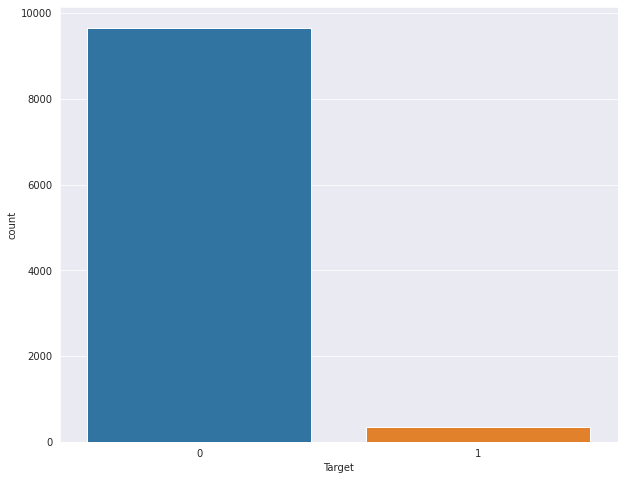

In [12]:
# Observe distribution of "Target : Failure or not" in a bar graph.
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Target")


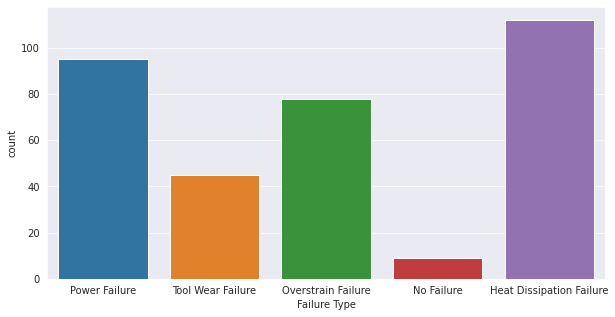

In [13]:
# Observe distribution of "Target Failure Type : Type of Failure" in a bar graph.
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")


In [14]:
# Observe distribution of failures in a pie chart
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(data,
title = 'Failure Types',
names = 'Failure Type')
fig.show()

In [16]:
# Air Temperature relation with Target/Failure Type
fig = px.box(data,
              y = "Air temperature [K]",
              x = "Target",
              title = "Air Temperature relation with Target and Failure Type",
              color = "Failure Type",
              width = 800,
              height = 400)
fig.show()


In [17]:
# Process Tempearture relation with Target/Failure Type
fig = px.box(data,
                  y = "Process temperature [K]",
                  x = "Target",
              title = "Process Tempearture relation with Target and Failure Type",
              color = "Failure Type",
              width = 800,
             height = 400)
fig.show()


In [18]:
# Rotational speed [rpm] relation with Target/Failure Type
fig = px.box(data,
y = "Air temperature [K]",
x = "Target",
title = "Rotational speed [rpm] relation with Target and Failure Type",
color = "Failure Type",
width = 800,
height = 400)
fig.show()


In [19]:
# Torque [Nm] relation with Target/Failure Type
fig = px.box(data,
y = "Torque [Nm]",
x = "Target",
title = "Torque [Nm] relation with Target and Failure Type",
color = "Failure Type",
width = 800,
height = 400)
fig.show()


In [20]:
# Tool wear [min] relation with Target/Failure Type
fig = px.box(data,
y = "Tool wear [min]",
x = "Target",
title = "Tool wear [min] relation with Target and Failure Type",
color = "Failure Type",
width = 800,
height = 400)
fig.show()

In [21]:
# Correlation with Product ID with Failure
pd.pivot_table(data,
index = 'Failure Type',
columns = 'Type',
aggfunc ='count')


Air temperature [K]              \
Type                                       H     L     M   
Failure Type                                               
Heat Dissipation Failure                   8    74    30   
No Failure                               979  5757  2916   
Overstrain Failure                         1    73     4   
Power Failure                              5    59    31   
Random Failures                            4    12     2   
Tool Wear Failure                          6    25    14   

                         Process temperature [K]              \
Type                                           H     L     M   
Failure Type                                                   
Heat Dissipation Failure                       8    74    30   
No Failure                                   979  5757  2916   
Overstrain Failure                             1    73     4   
Power Failure                                  5    59    31   
Random Failures                                4    12     2   
Tool Wear Failure                              6    25    14   

                         Rotational speed [rpm]             Target        \
Type                                          H     L     M      H     L   
Failure Type                                                               
Heat Dissipation Failure                      8    74    30      8    74   
No Failure                                  979  5757  2916    979  5757   
Overstrain Failure                            1    73     4      1    73   
Power Failure                                 5    59    31      5    59   
Random Failures                               4    12     2      4    12   
Tool Wear Failure                             6    25    14      6    25   

                               Tool wear [min]             Torque [Nm]        \
Type                         M               H     L     M           H     L   
Failure Type                                                                   
Heat Dissipation Failure    30               8    74    30           8    74   
No Failure                2916             979  5757  2916         979  5757   
Overstrain Failure           4               1    73     4           1    73   
Power Failure               31               5    59    31           5    59   
Random Failures              2               4    12     2           4    12   
Tool Wear Failure           14               6    25    14           6    25   

                                
Type                         M  
Failure Type                    
Heat Dissipation Failure    30  
No Failure                2916  
Overstrain Failure           4  
Power Failure               31  
Random Failures              2  
Tool Wear Failure           14

In [22]:
pd.pivot_table(data,
index = 'Target',
columns = 'Type',
aggfunc ='count')

Air temperature [K]             Failure Type              \
Type                     H     L     M            H     L     M   
Target                                                            
0                      982  5765  2914          982  5765  2914   
1                       21   235    83           21   235    83   

       Process temperature [K]             Rotational speed [rpm]              \
Type                         H     L     M                      H     L     M   
Target                                                                          
0                          982  5765  2914                    982  5765  2914   
1                           21   235    83                     21   235    83   

       Tool wear [min]             Torque [Nm]              
Type                 H     L     M           H     L     M  
Target                                                      
0                  982  5765  2914         982  5765  2914  
1                   21   235    83          21   235    83

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])
label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
                                                    data['Target'], test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform the training & test set
X_test = scaler.fit_transform(X_test)


In [25]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
classifier=[] #to store the model names
imported_as=[] #to store the instances of the models

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #creating instance
classifier.append('Logistic Regression')
imported_as.append('lr')

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

In [28]:
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')


In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
classifier.append('Naive Bayes')
imported_as.append('nb')

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
dt = DecisionTreeClassifier()
classifier.append('Decision Tree')
imported_as.append('dt')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

display(classifiers)

All Models Imported
Models stored in dataframe called classifiers


,Classifier,Imported as
0,Logistic Regression,lr
1,k Nearest Neighbours,knn
2,Support Vector Machine,svc
3,Random Forest,rfc
4,Naive Bayes,nb
5,Decision Tree,dt


In [37]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models


In [58]:
def fit(self):
    model_acc = []
    model_time= []

    for i in self.models:
        start=time.time()
        if i == 'knn':
            accuracy = []
            for j in range(1,200):
                kn = KNeighborsClassifier(n_neighbors=j)
                kn.fit(self.X_train,self.Y_train)
                predK = kn.predict(self.X_test)
                accuracy.append([accuracy_score(self.Y_test,predK),j])
            temp = accuracy[0]
            for m in accuracy:
                if temp[0] < m[0]:
                    temp=m
            i = KNeighborsClassifier(n_neighbors=temp[1])
        i.fit(self.X_train,self.Y_train)
        model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
        stop=time.time()
        model_time.append((stop-start))
        print(i,'has been fit')
    self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})

def results(self):
  models=self.models_output
  models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
  self.best = models['Models'][0]
  models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
  models['Accuracy']=models['Accuracy'].round(5)*100
  self.models_output_cleaned=models
  return(models)

def best_model(self,type):
    if type=='model':
      return(self.best)
    elif type=='name':
      return(self.models_output_cleaned['Models'][0])

def best_model_accuracy(self):
    return(self.models_output_cleaned['Accuracy'][0])

def best_model_runtime(self):
    return(round(self.models_output_cleaned['Runtime (s)'][0],3))

def best_model_predict(self,X_test):
    return(self.best.predict(X_test))

def best_model_clmatrix(self):
    return(classification_report(self.Y_test,self.best.predict(self.X_test)))


In [69]:
models_to_test = [rfc,lr,knn,svc,nb,dt] #models we are testing

In [74]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)

In [ ]:
classification.fit()

In [ ]:
classification.results()


In [ ]:
print('BestModel is:', classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid", {"grid.color": "1", "grid.linestyle": " "})
plot_confusion_matrix(classification.best_model(type='model'), X_test, y_test)